In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from google.colab import files
from google.colab import drive
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

## Read Data

In [ ]:
# drive.mount('/content/drive')

uploaded = files.upload()

Saving Simulated_Banking_Transactions.csv to Simulated_Banking_Transactions.csv


In [ ]:
# path = '/content/drive/MyDrive/Project_UAS24/Agung Dharma Saputra_211221005/Simulated_Banking_Transactions.xlsx'
# data = pd.read_excel(path)
data = pd.read_csv('Simulated_Banking_Transactions.csv')

print("First few rows of the dataset:")
display(data.head())

print("\nDataset Information:")
display(data.info())

First few rows of the dataset:


,TransactionID,CustomerID,Amount,Timestamp,Location,TransactionType,IsFraud
0,T667843,C1443,5045.15,2024-05-24 02:22:32,Houston,Online,0
1,T741994,C4035,6714.89,2024-03-06 02:22:32,Chicago,Online,0
2,T647390,C6386,7551.03,2024-09-25 02:22:32,Houston,Online,0
3,T570556,C2971,7353.28,2024-11-29 02:22:32,Houston,Online,0
4,T132670,C8972,3384.54,2024-02-23 02:22:32,Phoenix,Online,0



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    500 non-null    object 
 1   CustomerID       500 non-null    object 
 2   Amount           500 non-null    float64
 3   Timestamp        500 non-null    object 
 4   Location         500 non-null    object 
 5   TransactionType  500 non-null    object 
 6   IsFraud          500 non-null    int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 27.5+ KB


None

# Data Preprocessing

In [ ]:
# Convert timestamp and extract features
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%Y-%m-%d %H:%M:%S')
data['Hour'] = data['Timestamp'].dt.hour
data['DayOfWeek'] = data['Timestamp'].dt.dayofweek
data['Month'] = data['Timestamp'].dt.month

In [ ]:
# Encode categorical variables
le = LabelEncoder()
data['Location_encoded'] = le.fit_transform(data['Location'])
data['TransactionType_encoded'] = le.fit_transform(data['TransactionType'])

In [ ]:
# Display the preprocessed data
print("Preprocessed data:")
display(data.head())

Preprocessed data:


,TransactionID,CustomerID,Amount,Timestamp,Location,TransactionType,IsFraud,Hour,DayOfWeek,Month,Location_encoded,TransactionType_encoded
0,T667843,C1443,5045.15,2024-05-24 02:22:32,Houston,Online,0,2,4,5,1,1
1,T741994,C4035,6714.89,2024-03-06 02:22:32,Chicago,Online,0,2,2,3,0,1
2,T647390,C6386,7551.03,2024-09-25 02:22:32,Houston,Online,0,2,2,9,1,1
3,T570556,C2971,7353.28,2024-11-29 02:22:32,Houston,Online,0,2,4,11,1,1
4,T132670,C8972,3384.54,2024-02-23 02:22:32,Phoenix,Online,0,2,4,2,4,1


## Exploratory Data Analysis

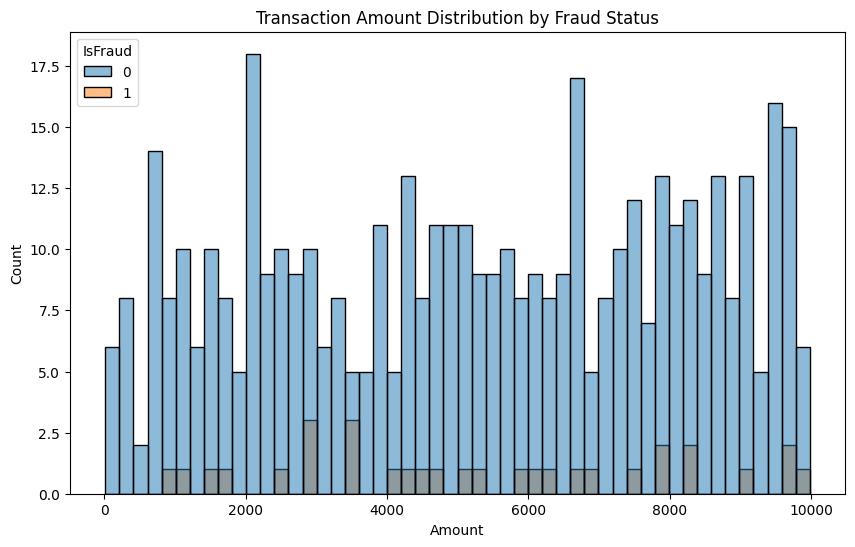

In [ ]:
# Plot transaction amounts distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Amount', hue='IsFraud', bins=50)
plt.title('Transaction Amount Distribution by Fraud Status')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

<Figure size 1000x600 with 0 Axes>

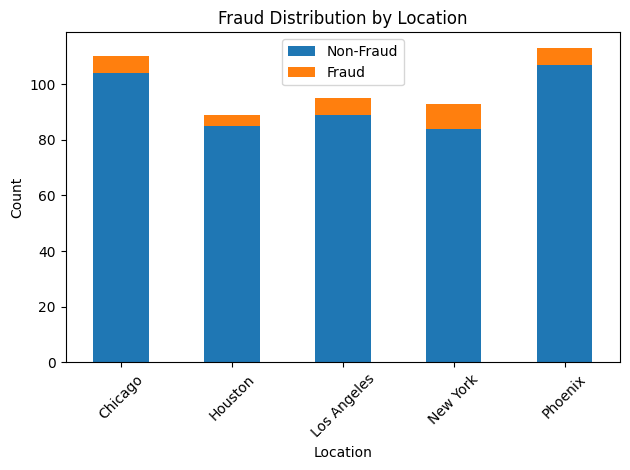

In [ ]:
# Plot fraud distribution by location
plt.figure(figsize=(10, 6))
fraud_by_location = pd.crosstab(data['Location'], data['IsFraud'])
fraud_by_location.plot(kind='bar', stacked=True)
plt.title('Fraud Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(['Non-Fraud', 'Fraud'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Prepare Features for Model

In [ ]:
features = ['Amount', 'Hour', 'DayOfWeek', 'Month',
           'Location_encoded', 'TransactionType_encoded']

X = data[features]
y = data['IsFraud']

# Resampling dengan SMOTE
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

print("Shape setelah resampling:")
print("X_resampled:", X_resampled.shape)
print("y_resampled:", y_resampled.shape)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Shape setelah resampling:
X_resampled: (938, 6)
y_resampled: (938,)

Training set shape: (750, 6)
Testing set shape: (188, 6)


## Train Gradient Boosting Model

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=100,
                                    learning_rate=0.1,
                                    max_depth=3,
                                    random_state=42)

gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

## Model Evaluation

In [ ]:
# Make predictions
y_pred = gb_model.predict(X_test)
y_pred_proba = gb_model.predict_proba(X_test)[:, 1]


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.67      0.76        95
           1       0.73      0.90      0.81        93

    accuracy                           0.79       188
   macro avg       0.80      0.79      0.78       188
weighted avg       0.80      0.79      0.78       188



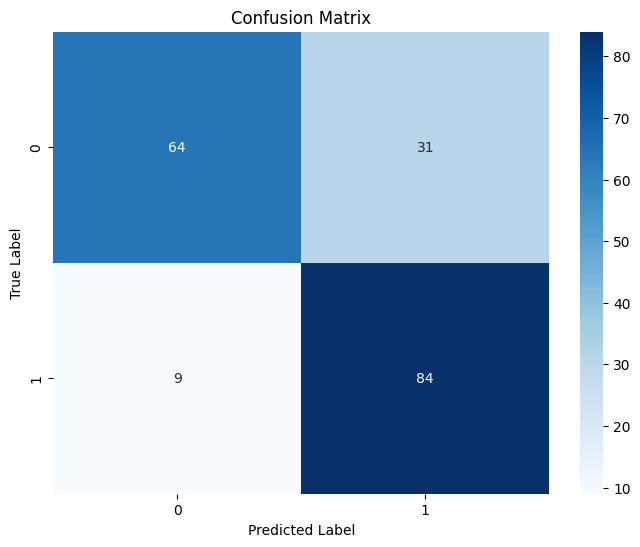

In [ ]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

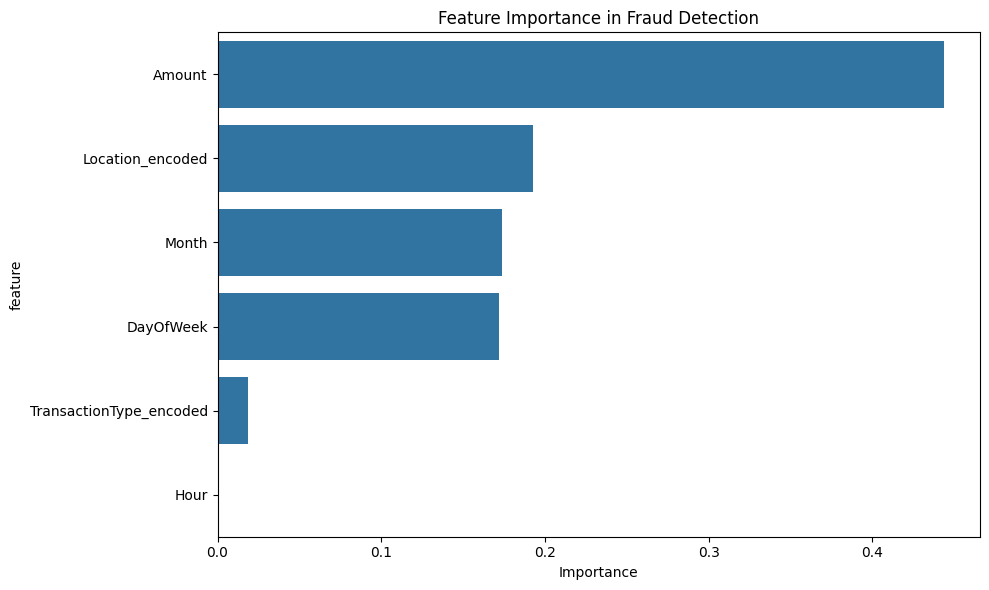

In [ ]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': gb_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Fraud Detection')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

## Make Predictions on New Data

In [ ]:
def predict_fraud_probability(model, new_data):
    # Ensure new_data has the same features as training data
    required_features = ['Amount', 'Hour', 'DayOfWeek', 'Month',
                        'Location_encoded', 'TransactionType_encoded']

    if isinstance(new_data, pd.DataFrame):
        X_new = new_data[required_features]
    else:
        X_new = pd.DataFrame([new_data], columns=required_features)

    # Get probability of fraud
    fraud_probability = model.predict_proba(X_new)[:, 1]
    return fraud_probability

# Example of using the prediction function
sample_transaction = {
    'Amount': 5000.0,
    'Hour': 2,
    'DayOfWeek': 3,
    'Month': 6,
    'Location_encoded': 2,
    'TransactionType_encoded': 1
}

probability = predict_fraud_probability(gb_model, sample_transaction)
print(f"\nProbability of fraud for sample transaction: {probability[0]:.2%}")


Probability of fraud for sample transaction: 45.54%


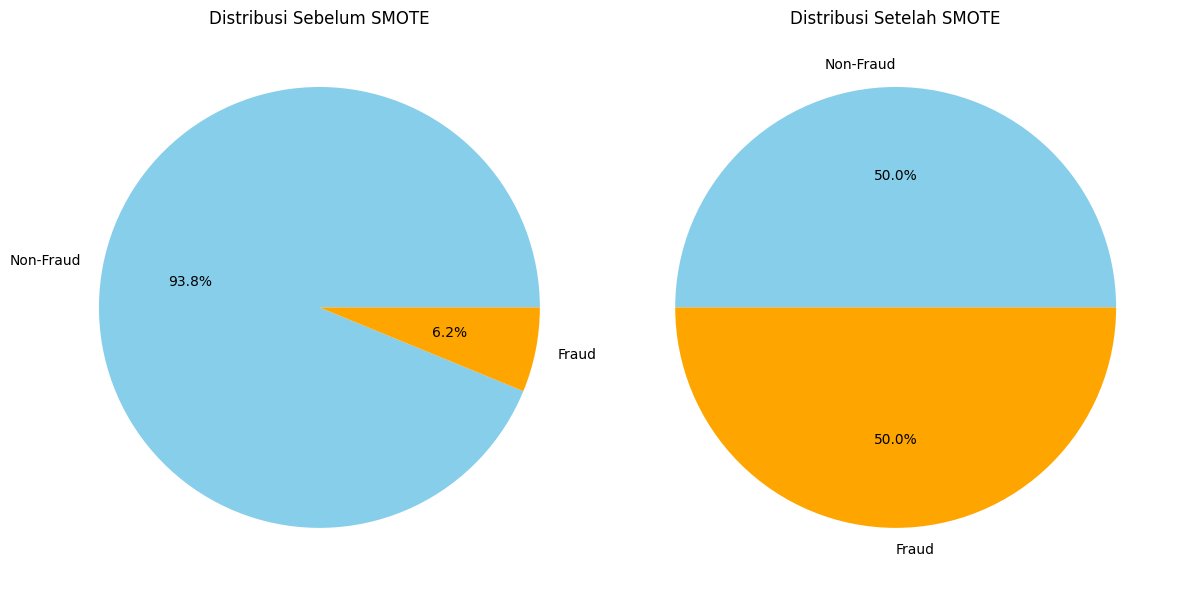

In [ ]:
# Distribusi data sebelum SMOTE
before_smote = y.value_counts()

# Distribusi data setelah SMOTE
after_smote = pd.Series(y_resampled).value_counts()

# Pie chart sebelum SMOTE
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
before_smote.plot.pie(autopct='%1.1f%%', labels=['Non-Fraud', 'Fraud'], colors=['skyblue', 'orange'])
plt.title('Distribusi Sebelum SMOTE')
plt.ylabel('')

# Pie chart setelah SMOTE
plt.subplot(1, 2, 2)
after_smote.plot.pie(autopct='%1.1f%%', labels=['Non-Fraud', 'Fraud'], colors=['skyblue', 'orange'])
plt.title('Distribusi Setelah SMOTE')
plt.ylabel('')

plt.tight_layout()
plt.show()


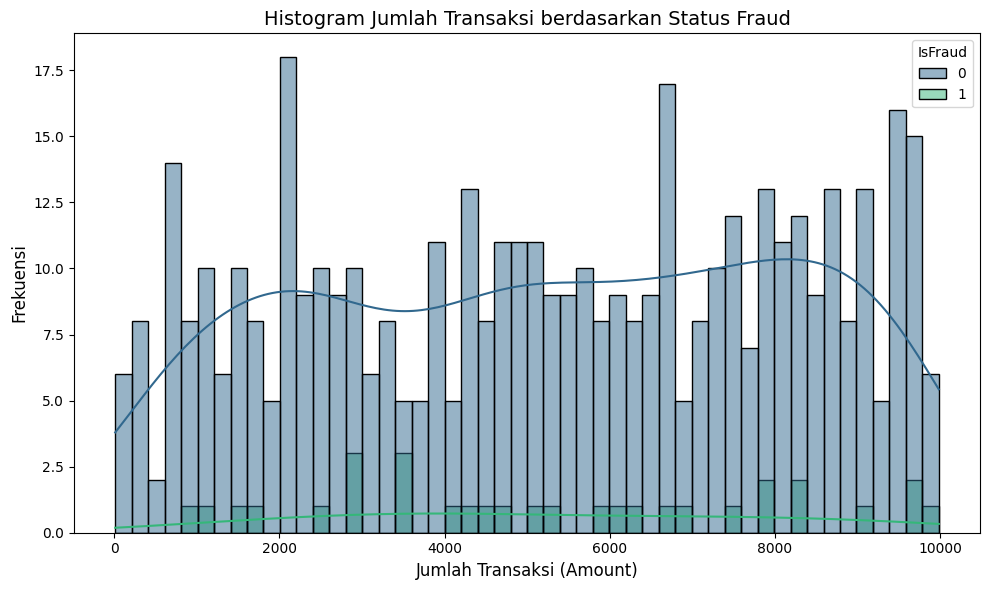

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Amount', bins=50, kde=True, hue='IsFraud', palette='viridis')
plt.title('Histogram Jumlah Transaksi berdasarkan Status Fraud', fontsize=14)
plt.xlabel('Jumlah Transaksi (Amount)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.tight_layout()
plt.show()

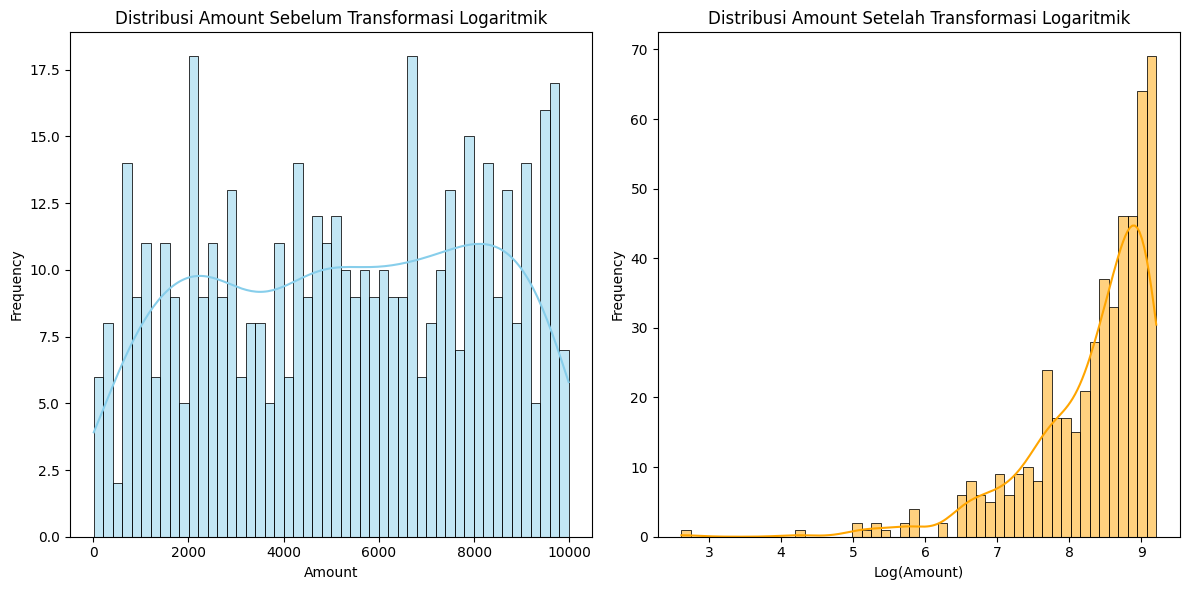

In [ ]:
# Perbandingan distribusi sebelum dan sesudah transformasi logaritmik pada variabel 'Amount'
# Pastikan nilai Amount > 0 untuk transformasi log
data['Amount_Log'] = np.log1p(data['Amount'])

# Plot distribusi sebelum dan sesudah transformasi
plt.figure(figsize=(12, 6))

# Distribusi sebelum transformasi
plt.subplot(1, 2, 1)
sns.histplot(data['Amount'], bins=50, kde=True, color='skyblue')
plt.title('Distribusi Amount Sebelum Transformasi Logaritmik')
plt.xlabel('Amount')
plt.ylabel('Frequency')

# Distribusi setelah transformasi
plt.subplot(1, 2, 2)
sns.histplot(data['Amount_Log'], bins=50, kde=True, color='orange')
plt.title('Distribusi Amount Setelah Transformasi Logaritmik')
plt.xlabel('Log(Amount)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


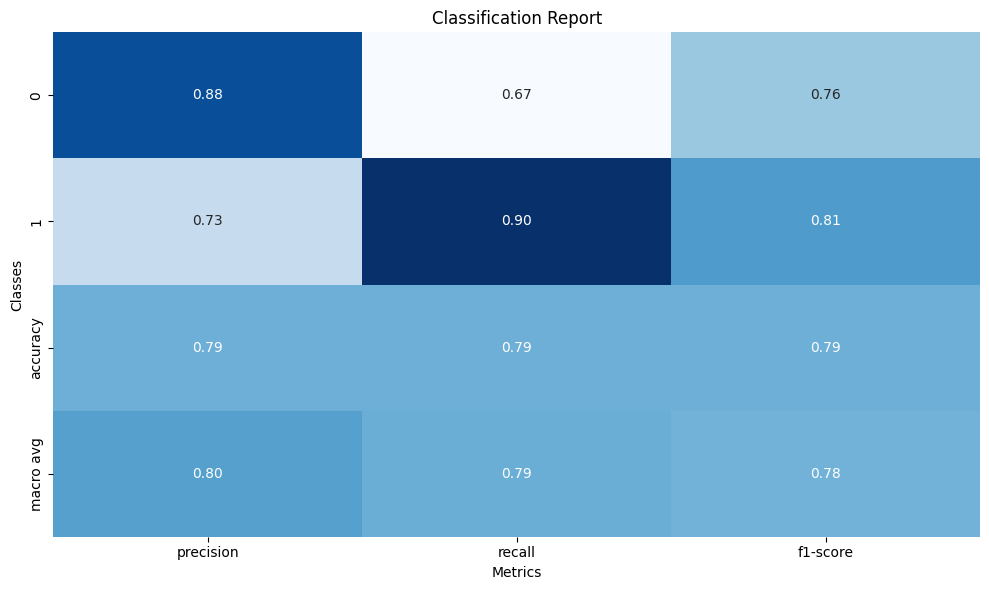

In [ ]:
# Membuat classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Mengonversi classification report ke DataFrame
report_df = pd.DataFrame(report).transpose()

# Plotting classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Classification Report")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.tight_layout()

Jumlah missing values per kolom:
 TransactionID      0
CustomerID         0
Amount             0
Timestamp          0
Location           0
TransactionType    0
IsFraud            0
dtype: int64

Total missing values: 0
Jumlah data duplikat: 0


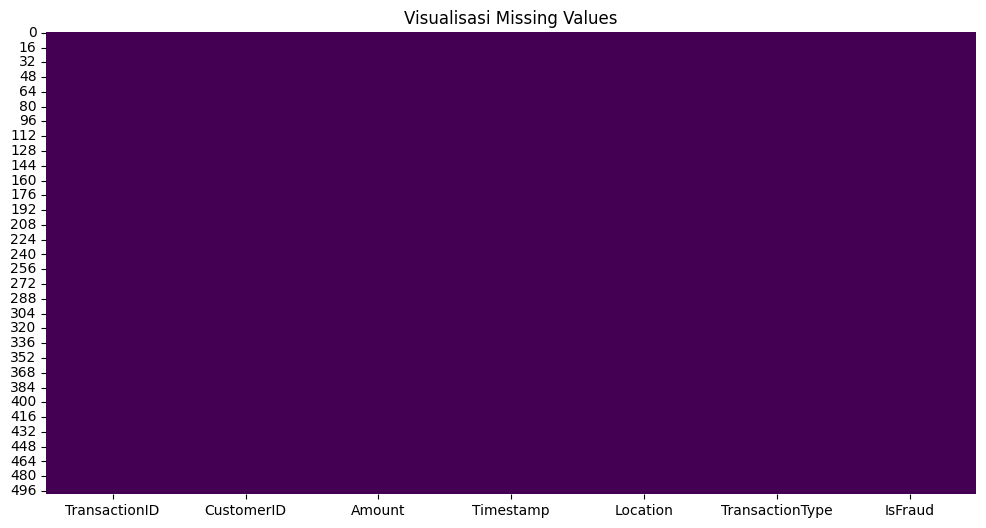

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("Simulated_Banking_Transactions.csv")  # ganti dengan nama file kamu

# Cek jumlah missing values per kolom
missing_values = df.isnull().sum()

# Cek total missing values di seluruh dataset
total_missing = df.isnull().sum().sum()

# Cek jumlah data duplikat
duplicate_rows = df.duplicated().sum()

# Tampilkan hasil
print("Jumlah missing values per kolom:\n", missing_values)
print("\nTotal missing values:", total_missing)
print("Jumlah data duplikat:", duplicate_rows)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Visualisasi Missing Values")
plt.show()



In [ ]:
# prompt: Download the .pkl file

import pickle
from google.colab import files

# Assuming 'gb_model' is your trained GradientBoostingClassifier model

# Save the model to a .pkl file
filename = 'gb_model.pkl'
pickle.dump(gb_model, open(filename, 'wb'))

# Download the file
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>